<a href="https://colab.research.google.com/github/EvgenyEsin/Machine_learning/blob/main/Machine_learning_sem_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решающие деревья. Домашнее задание

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [14]:
df = df.drop(["State"], axis=1)

df["International plan"].replace("Yes", 1, inplace = True)
df["International plan"].replace("No", 0, inplace = True)

df["Voice mail plan"].replace("Yes", 1, inplace = True)
df["Voice mail plan"].replace("No", 0, inplace = True)

df["Churn"] = df["Churn"].astype("int64") #Приобразуем столбец в тип данных int64

df["Churn"].replace("True", 1, inplace = True)
df["Churn"].replace("False", 0, inplace = True)

<ipython-input-14-111afcfcf6d8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["International plan"].replace("Yes", 1, inplace = True)
<ipython-input-14-111afcfcf6d8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [15]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

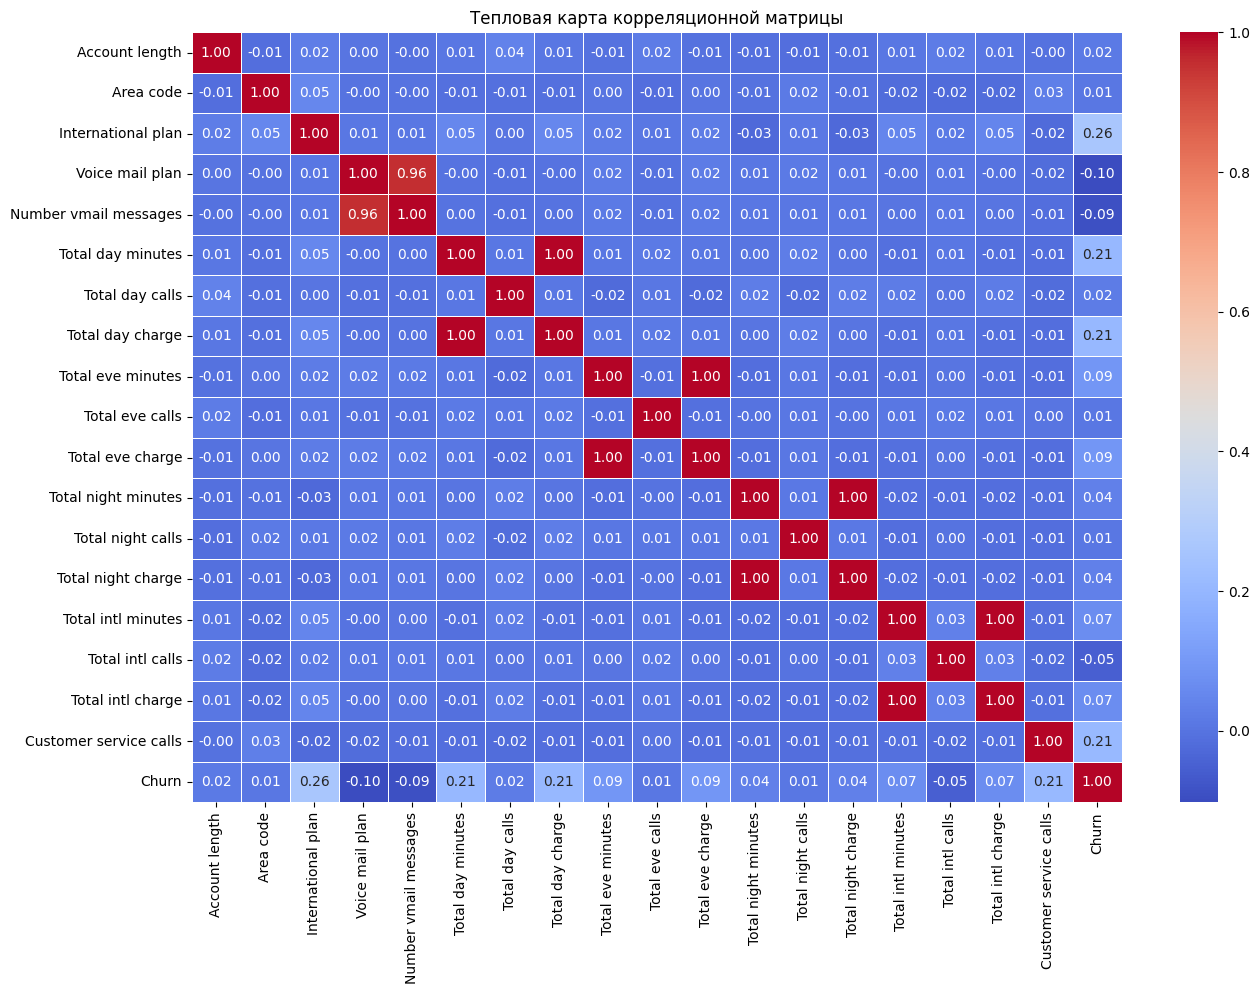

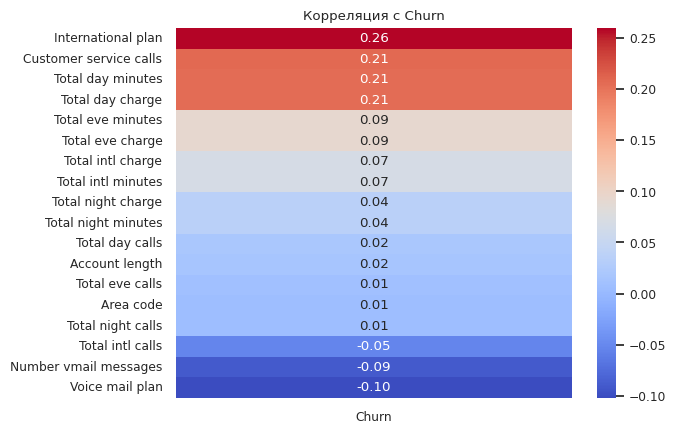

In [19]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

corr = df.corr()
target_corr = corr['Churn'].drop('Churn')

target_corr_sorted = target_corr.sort_values(ascending=False)


sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с Churn')
plt.show()

Проверьте баланс классов. Является ли выборка сбалансированной?

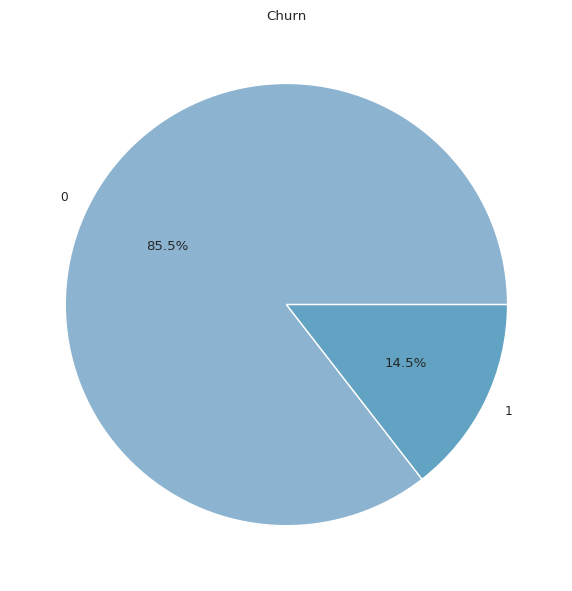

In [20]:
df.Churn.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,6))
plt.title('Churn')
plt.tight_layout()
plt.axis('off');

Выборка несбалансирована

Для балансировки данных используем метод upsampling data

In [21]:
# Найдем соотношение количества строк с 0 и 1
n = len(df.loc[df['Churn']==0])//len(df.loc[df['Churn']==1])
n

5

Создадим новый датасет методом upsampling:

возьмём все данные с классом 1

продублируем их n раз

присоединим к данным класса 0 продублированный класс 1 и перемешаем

In [22]:
df_1 = df.loc[df['Churn']==1]
df_1 = df_1.loc[df_1.index.repeat(n)]
df = pd.concat([df.loc[df['Churn']==0], df_1]).sample(frac=1)

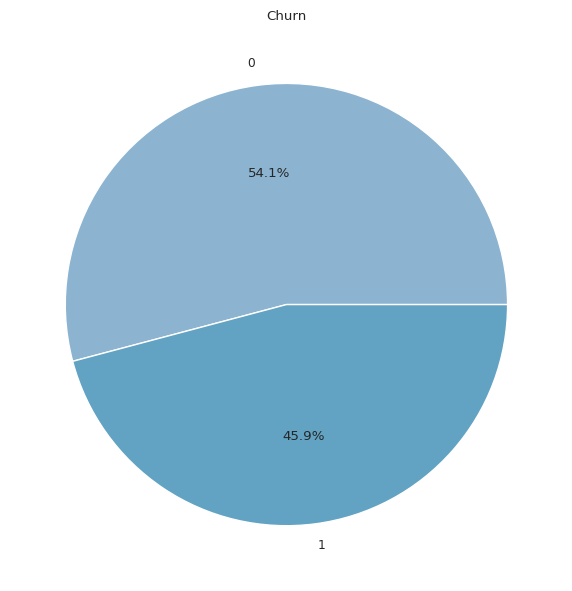

In [23]:
df.Churn.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,6))
plt.title('Churn')
plt.tight_layout()
plt.axis('off');

Теперь целевой признак сбалансирован

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [24]:
from sklearn.model_selection import train_test_split
# ваш код здесь

In [25]:
X = df.drop(["Churn"], axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [26]:
from sklearn.preprocessing import StandardScaler
# ваш код здесь

In [27]:
# сщздаем экзампляр класса для масштабирования данных
scaler = StandardScaler()

In [28]:
# сам процесс масштабирования
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,-1.411150,1.712272,-0.454548,-0.55593,-0.533785,-1.802729,0.258508,-1.802963,-0.353821,0.477091,-0.353983,-0.359411,0.565082,-0.358983,-1.089332,0.257850,-1.087315,-0.51699
1,-0.659529,-0.689046,2.199986,-0.55593,-0.533785,0.359481,-1.922581,0.359334,-1.960303,0.926702,-1.959448,-0.525585,-1.885616,-0.523596,-0.263980,-0.140882,-0.263287,1.41321
2,0.317578,-0.524250,-0.454548,-0.55593,-0.533785,-0.686592,0.888600,-0.686352,-0.870962,0.527048,-0.869860,1.476519,0.309801,1.478455,-0.515174,-0.539614,-0.515812,2.05661
3,-0.459097,1.712272,-0.454548,-0.55593,-0.533785,-1.810876,-1.486363,-1.810631,0.668665,0.726875,0.668518,-1.156248,0.616138,-1.155355,0.669026,-0.140882,0.667067,-0.51699
4,2.497277,-0.524250,-0.454548,-0.55593,-0.533785,0.597373,0.452383,0.597033,1.844524,-0.721872,1.843700,0.984001,-0.966604,0.984616,0.274293,-0.140882,0.268344,-0.51699


In [29]:
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,-1.390892,1.696772,-0.423207,-0.55493,-0.533970,-1.010464,-1.454188,-1.010901,-2.985704,-1.126487,-2.985488,-1.812326,-1.046353,-1.813946,-0.509127,-0.560529,-0.513911,-1.137744
1,0.014932,-0.534551,-0.423207,1.80203,0.845707,-0.660697,-0.823987,-0.661038,-0.647347,-0.817548,-0.646617,-0.661359,0.557710,-0.660247,0.409807,1.055594,0.415547,-1.137744
2,-0.138431,1.696772,-0.423207,-0.55493,-0.533970,0.324129,-1.211803,0.324076,-0.302687,0.006290,-0.301611,-1.672626,0.056440,-1.670312,-1.993560,-0.156498,-1.993190,0.740663
3,1.114031,1.696772,2.362908,-0.55493,-0.533970,-0.933096,-1.745050,-0.933153,1.102612,-0.354139,1.103056,0.231058,1.359742,0.229353,0.303776,-0.560529,0.297728,-0.511608
4,0.526141,-0.534551,-0.423207,-0.55493,-0.533970,0.827020,-0.678556,0.826589,0.403771,0.057779,0.404083,1.363260,1.008853,1.364518,-0.756533,-0.560529,-0.762640,1.992935


После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [ ]:
# ваш код здесь

In [35]:
col = X.columns

X_train = pd.DataFrame(X_train, columns=col)
X_test = pd.DataFrame(X_test, columns=col)

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [40]:
from sklearn.linear_model import LogisticRegression
# ваш код здесь

## Logistic Regression

In [37]:
# Инициализируем модель логистической регрессии с параметрами по умолчанию
model_lr = LogisticRegression(max_iter=1000)

In [39]:
# Обучим модель на обучающем наборе
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## SVC

In [41]:
from sklearn.svm import SVC

In [42]:
# Инициализируем модель SVC с параметрами по умолчанию
model_SVC = SVC()
model_SVC.fit(X_train, y_train)

SVC()

С помощью обученных моделей сделайте предсказание на тестовых данных.

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# ваш код здесь

## Logistic Regression предсказание

In [52]:
#функция для вывода параметров модели
def model_report(model, X, y, label):

    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)
    y_proba_one = y_proba[:, 1]

    roc_auc = roc_auc_score(y, y_proba_one)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)

    results.loc[label, 'AUC-ROC'] = roc_auc
    results.loc[label, 'Accuracy'] = accuracy
    results.loc[label, 'Precision'] = precision
    results.loc[label, 'Recall'] = recall
    results.loc[label, 'F1'] = f1

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    fpr, tpr, thresholds = roc_curve(y, y_proba_one)
    lw = 2
    axes[0].plot(fpr, tpr, lw=lw, color='grey')
    axes[0].plot([0, 1], [0, 1], color='r')
    axes[0].set_xlim([-0.02, 1])
    axes[0].set_ylim([0.0, 1.02])
    axes[0].set_xlabel('\nFalse Positive Rate')
    axes[0].set_ylabel('True Positive Rate\n')
    axes[0].text(0.6, 0.2,
                'ROC-AUC = {:.2f}\n\nAccuracy = {:.2f}\n\nPrecision = {:.2f}\n\nRecall = {:.2f}\n\nF1 = {:.2f}'
                 .format(roc_auc, accuracy, precision, recall, f1))

    cm = confusion_matrix(y, y_pred)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    pcts = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, pcts)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Reds', fmt ='', ax=axes[1])
    axes[1].set_xlabel('\nPredict')
    axes[1].set_ylabel('True value\n')

    plt.tight_layout()
    plt.show()

    report = classification_report(
        y, y_pred,
        target_names=['0', '1'], output_dict=True
    )

In [53]:
results = pd.DataFrame(
    [[0] * 5] * 2,
    index=['LogisticRegression', 'SVC'],
    columns=['AUC-ROC', 'Accuracy', 'Precision', 'Recall', 'F1'])

<ipython-input-52-d1197e63f83a>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8276771445509847' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[label, 'AUC-ROC'] = roc_auc
<ipython-input-52-d1197e63f83a>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7651898734177215' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[label, 'Accuracy'] = accuracy
<ipython-input-52-d1197e63f83a>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7582260371959942' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[label, 'Precision'] = precision
<ipython-input-52-d1197e63f83a>:17: FutureWarning: S

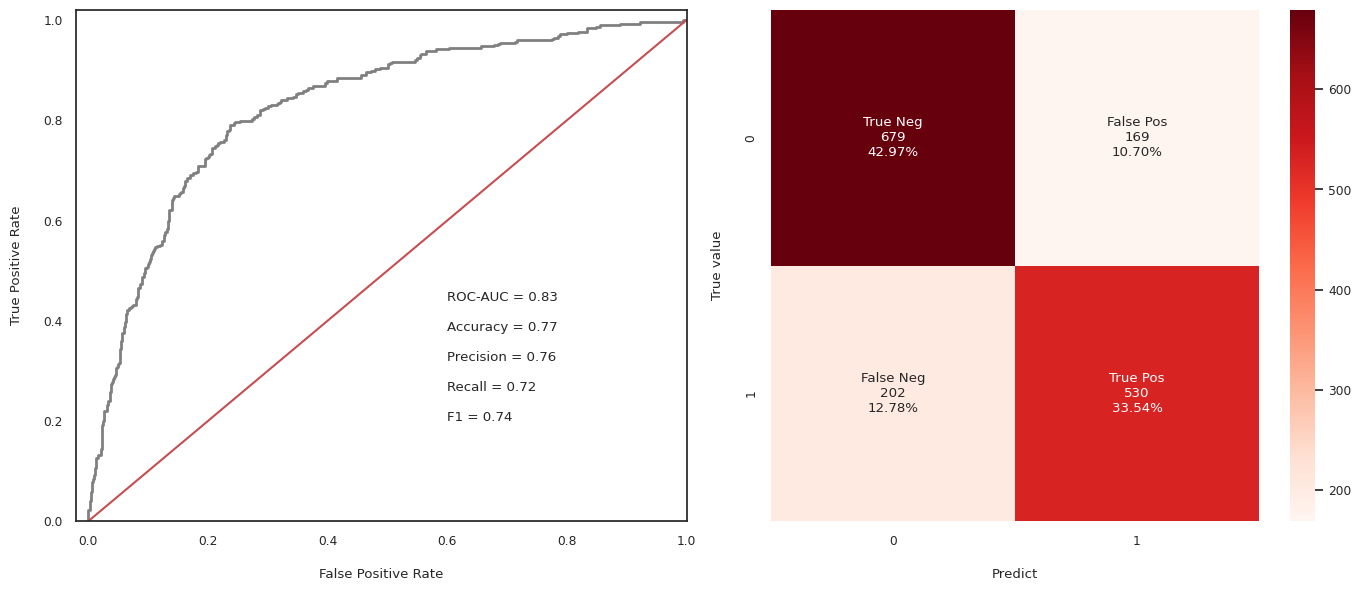

In [54]:
# Результаты работы модели на тестовых данных
model_report(model_lr, X_test, y_test, label='LogisticRegression')

## SVC предсказание

In [55]:
# Результаты работы модели на тестовых данных
pred_unb = model_SVC.predict(X_test)
print(classification_report(y_test, pred_unb))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       848
           1       0.91      0.85      0.88       732

    accuracy                           0.89      1580
   macro avg       0.89      0.89      0.89      1580
weighted avg       0.89      0.89      0.89      1580



## DecisionTreeClassifier

Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте. Используйте метрику для оценки.

In [56]:
from sklearn.tree import DecisionTreeClassifier
# ваш код здесь

In [57]:
# Создание и обучение дерева решений для классификации
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
# Прогнозирование классов на тестовом наборе
y_pred = clf.predict(X_test)

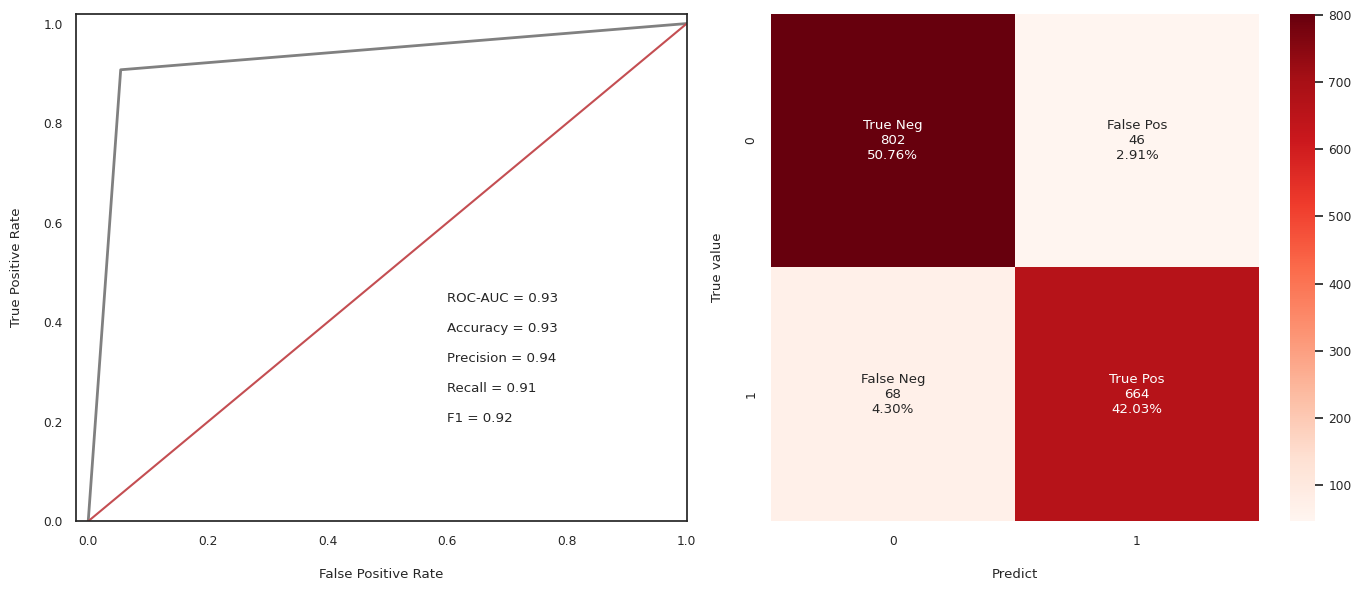

In [60]:
# Результаты работы модели на тестовых данных
model_report(clf, X_test, y_test, label='DecisionTreeClassifier')

Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [ ]:
# ваш код здесь

In [61]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2813,52,510,0,0,0,129.3,80,21.98,142.7,101,12.13,258.3,89,11.62,12.3,4,3.32,3,0
1420,81,415,1,0,0,149.4,68,25.40,171.9,98,14.61,214.5,97,9.65,17.9,3,4.83,3,1
2145,105,415,0,0,0,193.7,108,32.93,183.2,124,15.57,293.7,72,13.22,10.8,5,2.92,1,0
2908,148,415,0,0,0,279.3,104,47.48,201.6,87,17.14,280.8,99,12.64,7.9,2,2.13,2,1
399,66,415,0,0,0,167.3,91,28.44,230.0,68,19.55,191.7,118,8.63,10.6,5,2.86,1,1


In [62]:
X = df.drop(["Churn"], axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
# Создание и обучение дерева решений для классификации
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

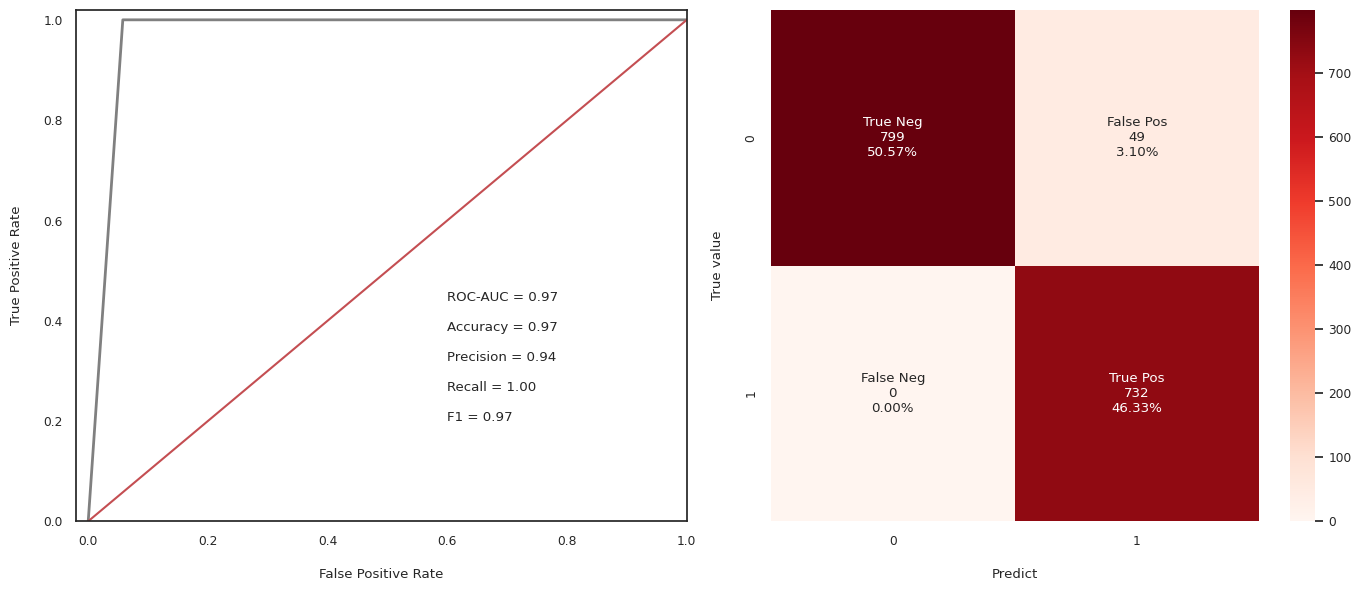

In [64]:
# Результаты работы модели на тестовых данных
model_report(clf, X_test, y_test, label='DecisionTreeClassifier')

В результате работа модели дерева решений без масштабирования данных показала лучшие метрики, чем после масштабирования.

Какая модель справилась с решением задачи?

In [ ]:
# ваш ответ здесь

Наилучшим образом с решением задачи справилась модель дерева решений без масштабирования данных